# Diffusion from scratch

The goal of diffusion (and generative deep learning): to learn a **distribution over data**, to generate new data.
- To paraphrase: "to systematically destroy structure in a data distribution through an iterative forward diffusion process. then learn a reverse diffusion process that restores structure in data"
    - i.e. add noise to an image and use a neural network to restore the image. and then with just random noise, we can let the neural network (that learned how to restore images) remove noise until we have a new image 
- the reverse process: neural network that learns to remove noise from an image

In [11]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

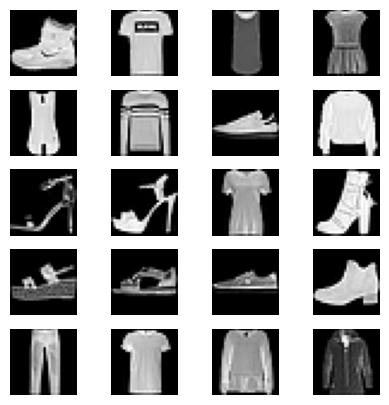

In [16]:
def show_images(dataset, num_samples=20, cols=4):
    """ plots some samples from the dataset """
    plt.figure(figsize=(5, 5)) 
    rows = (num_samples + cols - 1) // cols  # compute number of rows

    for i in range(num_samples):
        img, _ = dataset[i]  # unpack the image and label
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img.squeeze(), cmap="gray") 
        plt.axis("off")  # remove axes for clarity

    plt.show() 

# load training data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# load test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# call the function to show images
show_images(training_data)